In [16]:
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt
from sympy.printing.pretty.pretty_symbology import line_width

# Gradient descent algorithm for the function $x^2 - 4x + 1$

In [6]:
def function(x:float) -> float:
    return x**2 - 4 * x + 1

In [5]:
# Derivative of the function to find the minimum value
def gradient_function(x:float) -> float:
    return 2 * x - 4

In [7]:
def gradient_descent(start:float, gradient: Callable[[float], float], learn_rate:float, max_iter:int, tol:float=0.01):
    x = start
    steps = [start]  # Tracks x values

    for _ in range(max_iter):
        diff = learn_rate * gradient(x)
        if np.abs(diff) < tol:
            break
        x = x - diff
        steps.append(x)   # Tracks new x step value

    return steps, x

# Displaying the evolution of the gradient descent algorithm

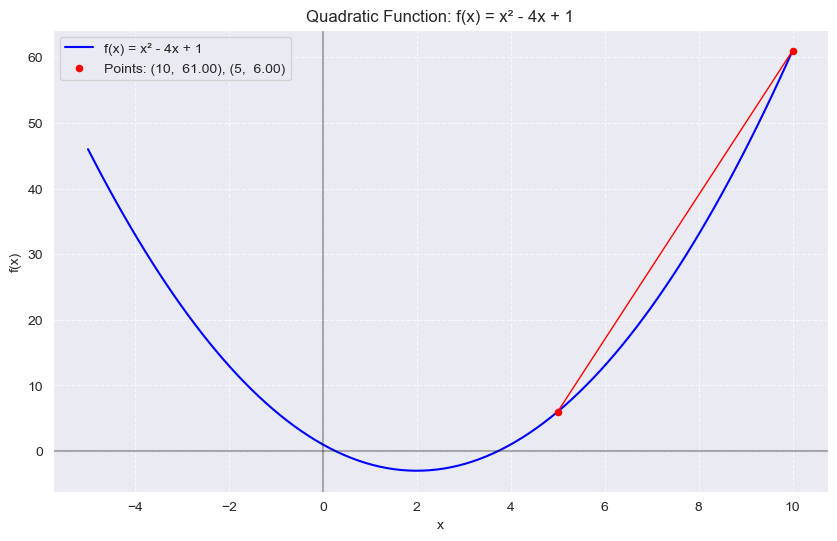

In [25]:
# Function points
x = np.linspace(-5, 10, 100)
y = function(x)

# Gradient descent step points evolution
x1 = 10
x2 = 5
y1 = function(x1)
y2 = function(x2)

# Displaying the chart for the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = x² - 4x + 1')

# Adding the gradient descent points
plt.scatter([x1, x2], [y1, y2], color='red', s=20, zorder=5, label=f"Points: ({x1}, {y1: .2f}), ({x2}, {y2: .2f})")
plt.plot([x1, x2], [y1, y2], 'r-', linewidth=1)


# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add title and labels
plt.title('Quadratic Function: f(x) = x² - 4x + 1')
plt.xlabel('x')
plt.ylabel('f(x)')

# Add legend
plt.legend()

# Add x and y axis lines
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.show()

# MAIN

In [15]:
history, result = gradient_descent(9, gradient_function, 0.1, 100)

print(f"min of the function happens at: {result}")
print(f"x steps history: {history}")

min of the function happens at: 2.041320706725109
x steps history: [9, 7.6, 6.4799999999999995, 5.584, 4.8671999999999995, 4.29376, 3.8350079999999998, 3.4680063999999997, 3.17440512, 2.939524096, 2.7516192768, 2.60129542144, 2.481036337152, 2.3848290697216, 2.30786325577728, 2.246290604621824, 2.197032483697459, 2.1576259869579673, 2.1261007895663737, 2.100880631653099, 2.080704505322479, 2.064563604257983, 2.0516508834063862, 2.041320706725109]
